In [1]:
import pandas as pd
import numpy as np

import sqlite3

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

# adds commas to large nums
pd.options.display.float_format = '{:,.2f}'.format

# seaborn plot styles
sns.set_style('darkgrid')
sns.set_context('talk')

# Look at db file:

In [2]:
# connect to db
con = sqlite3.connect('data/im.db')

In [3]:
# look at table names
pd.read_sql("""

SELECT name
FROM sqlite_master

""", con)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


8 tables in db

In [4]:
# shows runtime and genre
basics = pd.read_sql("""

SELECT *
FROM movie_basics

""", con).drop(['start_year'], axis=1)

basics.columns = ['movie_id', 'title', 'original_title', 'runtime',
       'genres']

basics['genres'] = basics['genres'].str.replace(',', ' ')

print(basics.shape)
basics.head()

(146144, 5)


,movie_id,title,original_title,runtime,genres
0,tt0063540,Sunghursh,Sunghursh,175.00,Action Crime Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,114.00,Biography Drama
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,122.00,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,nan,Comedy Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,80.00,Comedy Drama Fantasy


In [5]:
# 14504 rows with different original titles are foreign films
basics.query("title != original_title")

,movie_id,title,original_title,runtime,genres
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,114.00,Biography Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,80.00,Comedy Drama Fantasy
11,tt0154039,So Much for Justice!,Oda az igazság,100.00,History
13,tt0162942,Children of the Green Dragon,A zöld sárkány gyermekei,89.00,Drama
15,tt0176694,The Tragedy of Man,Az ember tragédiája,160.00,Animation Drama History
...,...,...,...,...,...
146026,tt9899938,Journey of the Sky Goddess,Kibaiyanse! Watashi,116.00,Comedy Drama
146028,tt9900060,Lupin the Third: Fujiko Mine's Lie,Lupin the IIIrd: Mine Fujiko no Uso,nan,Adventure Crime Drama
146037,tt9900688,Big Three Dragons,Da San Yuan,111.00,Comedy
146121,tt9914254,A Cherry Tale,Kirsebæreventyret,85.00,Documentary


In [6]:
# links movie_id to persons table (directors)
directors = pd.read_sql("""

SELECT *
FROM directors

""", con)

directors.columns = ['movie_id', 'director_id']

print(directors.shape)
directors.head()

(291174, 2)


,movie_id,director_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [7]:
# links movie_id to persons table
known = pd.read_sql("""

SELECT *
FROM known_for

""", con)

known.columns = ['known_for_id', 'movie_id']

print(known.shape)
known.head()

(1638260, 2)


,known_for_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


In [8]:
# links movie_id to all known titles (from diff regions). first 47 rows are Jurassic World
aka = pd.read_sql("""

SELECT *
FROM movie_akas

""", con)

print(aka.shape)
aka.head()

(331703, 8)


,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.00
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.00
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.00
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.00
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.00


In [9]:
aka.groupby('movie_id').count()

,ordering,title,region,language,types,attributes,is_original_title
movie_id,,,,,,,
tt0063540,5,5,4,3,1,3,5
tt0066787,4,4,2,1,1,0,4
tt0069049,13,13,12,0,10,0,13
tt0069204,3,3,2,2,1,0,3
tt0100275,5,5,4,1,3,1,5
...,...,...,...,...,...,...,...
tt9911774,3,3,2,2,1,2,3
tt9913248,3,3,1,0,1,0,3
tt9914254,3,3,2,1,2,0,3


In [10]:
# seems to refer to viewer ratings (not critic reviews). Max numvotes is almost 2mil
ratings = pd.read_sql("""

SELECT *
FROM movie_ratings

""", con)

print(ratings.shape)
ratings.head()

(73856, 3)


,movie_id,averagerating,numvotes
0,tt10356526,8.30,31
1,tt10384606,8.90,559
2,tt1042974,6.40,20
3,tt1043726,4.20,50352
4,tt1060240,6.50,21


In [11]:
# links person_id to each person's profession
persons = pd.read_sql("""

SELECT *
FROM persons

""", con)

print(persons.shape)
persons.head()

(606648, 5)


,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,nan,nan,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,nan,nan,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,nan,nan,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,nan,nan,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,nan,nan,"production_designer,art_department,set_decorator"


In [12]:
# seems to show specific roles/jobs for each person in each movie
principals = pd.read_sql("""

SELECT *
FROM principals

""", con)

print(principals.shape)
principals.head()

(1028186, 6)


,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


In [13]:
# links movie_id to persons table (writers)
writers = pd.read_sql("""

SELECT *
FROM writers

""", con)

writers.columns = ['movie_id', 'writer_id']

print(writers.shape)
writers.head()

(255873, 2)


,movie_id,writer_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


## DB breakdown:
- basics - movie, runtime, genre (146144 movies)
- aka - for inter-regional reference
- ratings - user ratings


- [directors, known_for, persons, principals, writers] - refer to creatives associated with a movie

### Junction tables:
- directors
- known_for
- writers

In [14]:
# concatenate 3 bridge tables

# 52% of writers are duplicated
# 57% of movies duplicated

# 51% of movies are duplicated
# 62% of directors are duplicated

# 65 % of known_for are duplicated
# 69 % of movies are duplicated
directors.director_id.duplicated().sum()

181921

In [15]:
persons.head() # each row is a different, unique person

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,nan,nan,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,nan,nan,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,nan,nan,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,nan,nan,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,nan,nan,"production_designer,art_department,set_decorator"


# Look at 5 csv files:

In [16]:
# shows profit
gross = pd.read_csv('data/bom.movie_gross.csv.gz').drop(['studio', 'year'], axis=1)

# convert foreign_gross to float
gross['foreign_gross'] = gross['foreign_gross'].str.replace(',', '')
gross['foreign_gross'] = gross['foreign_gross'].astype(float)

print(gross.shape)
gross.head()

(3387, 3)


,title,domestic_gross,foreign_gross
0,Toy Story 3,"415,000,000.00","652,000,000.00"
1,Alice in Wonderland (2010),"334,200,000.00","691,300,000.00"
2,Harry Potter and the Deathly Hallows Part 1,"296,000,000.00","664,300,000.00"
3,Inception,"292,600,000.00","535,700,000.00"
4,Shrek Forever After,"238,700,000.00","513,900,000.00"


In [17]:
# movie details
# no titles, just ids
# 'currency' only has '$', 'nox_office' mostly null
info = pd.read_csv('data/rt.movie_info.tsv.gz', delimiter='\t').drop(['synopsis', 'dvd_date', 'studio', 'currency', 
                                                                      'theater_date', 'box_office'], axis=1)

# remove '|', and 'and ' from genre
info['genre'] = info['genre'].str.replace('|', ' ').str.replace('and ', '')

info['runtime']

print(info.shape)
info.head()

(1560, 6)


,id,rating,genre,director,writer,runtime
0,1,R,Action Adventure Classics Drama,William Friedkin,Ernest Tidyman,104 minutes
1,3,R,Drama Science Fiction Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,108 minutes
2,5,R,Drama Musical Performing Arts,Allison Anders,Allison Anders,116 minutes
3,6,R,Drama Mystery Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,128 minutes
4,7,NR,Drama Romance,Rodney Bennett,Giles Cooper,200 minutes


In [18]:
# get all unique genres from info
all_genres = [genre for genres in info['genre'] for genre in str(genres).split()]
print(f'There are {len(set(all_genres))} unique genres in info:')

print(sorted(set(all_genres)))


There are 37 unique genres in info:
['Action', 'Adventure', 'Animation', 'Anime', 'Art', 'Arts', 'Classics', 'Comedy', 'Cult', 'Documentary', 'Drama', 'Faith', 'Family', 'Fantasy', 'Fiction', 'Fitness', 'Gay', 'Horror', 'House', 'Interest', 'International', 'Kids', 'Lesbian', 'Manga', 'Movies', 'Musical', 'Mystery', 'Performing', 'Romance', 'Science', 'Special', 'Spirituality', 'Sports', 'Suspense', 'Television', 'Western', 'nan']


In [19]:
reviews_orig = pd.read_csv('data/rt.reviews.tsv.gz', delimiter='\t', compression='gzip', encoding='latin1')
reviews_orig.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [20]:
# critic reviews
# no titles, just ids
# id == 3 corresponds to "Cosmopolis", id == 10 corresponds to "Orange County"
reviews = pd.read_csv('data/rt.reviews.tsv.gz', delimiter='\t', compression='gzip', encoding='latin1')

# drop all cols but 'id' and 'fresh'
reviews = reviews[['id', 'fresh']]

# turn 'fresh' into binary column
# fresh >= 60% positive, rotten < 60% positive
reviews['fresh'] = (reviews['fresh'] == 'fresh').astype(int)

# get proportion of "fresh ratings for each movie"
reviews = reviews.groupby('id', as_index=False).mean()

# rename 'fresh' -> 'precent', add true/false 'fresh' col
reviews.columns = ['id', 'percent_pos']
reviews['fresh'] = reviews['percent_pos'] >= 0.6

print(reviews.shape)
reviews.head()

(1135, 3)


,id,percent_pos,fresh
0,3,0.63,True
1,5,0.78,True
2,6,0.56,False
3,8,0.75,True
4,10,0.46,False


In [21]:
print(f'There are {reviews["id"].nunique()} unique movies with critic reviews.')

There are 1135 unique movies with critic reviews.


In [22]:
# movie info
# id is different than info/reviews
tmdb = pd.read_csv('data/tmdb.movies.csv.gz', index_col='Unnamed: 0').drop(['id', 'original_language', 'original_title'], axis=1)

# remove '[', ']', and ',' from genre_ids
tmdb['genre_ids'] = tmdb['genre_ids'].str.replace('[\[\]\,]', '', regex=True)

print(tmdb.shape)
tmdb.head()

(26517, 6)


,genre_ids,popularity,release_date,title,vote_average,vote_count
0,12 14 10751,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788
1,14 12 16 10751,28.73,2010-03-26,How to Train Your Dragon,7.70,7610
2,12 28 878,28.52,2010-05-07,Iron Man 2,6.80,12368
3,16 35 10751,28.00,1995-11-22,Toy Story,7.90,10174
4,28 878 12,27.92,2010-07-16,Inception,8.30,22186


In [23]:
# get all unique genres from tmdb
all_genre_ids = [item for sublist in tmdb['genre_ids'] for item in sublist.split()]
print(f'There are {len(set(all_genre_ids))} unique genres in tmdb')

There are 19 unique genres in tmdb


In [24]:
# found this on reddit
genre_map = {28:'Action',16:'Animation',99:'Documentary',18:'Drama',10751:'Family',14:'Fantasy',36:'History',35:'Comedy',
             10752:'War',80:'Crime',10402:'Musical',9648:'Mystery',10749:'Romance',878:'Science Fiction',27:'Horror',
             10770:'TV movie',53:'Thriller',37:'Western',12:'Adventure'}

# map genre_id to genre
def map_genres(ids_string, genre_map):
    return ' '.join([genre_map[int(genre_id)] for genre_id in ids_string.split() if int(genre_id) in genre_map])

tmdb['genre_names'] = tmdb['genre_ids'].apply(lambda x: map_genres(x, genre_map))
tmdb = tmdb.drop(['genre_ids'], axis=1)
tmdb.head()

,popularity,release_date,title,vote_average,vote_count,genre_names
0,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788,Adventure Fantasy Family
1,28.73,2010-03-26,How to Train Your Dragon,7.70,7610,Fantasy Adventure Animation Family
2,28.52,2010-05-07,Iron Man 2,6.80,12368,Adventure Action Science Fiction
3,28.00,1995-11-22,Toy Story,7.90,10174,Animation Comedy Family
4,27.92,2010-07-16,Inception,8.30,22186,Action Science Fiction Adventure


In [25]:
# shows budget and gross profit
# id just seems to be budget sorted DESC
# id is only 1-100, repeats over again
budget = pd.read_csv('data/tn.movie_budgets.csv.gz').drop(['id', 'release_date'], axis=1)

# rename 'movie' to 'title' for future join
budget.columns = ['title', 'production_budget', 'domestic_gross', 'worldwide_gross']

for col in budget.columns[1:]:
    budget[col] = budget[col].str.replace('[\$\,]', '', regex=True).astype(float)
budget['profit_ratio'] = budget['worldwide_gross'] / budget['production_budget']
budget['ROI'] = (budget['worldwide_gross'] - budget['production_budget']) / budget['production_budget']

print(budget.shape)
budget.head()

(5782, 6)


,title,production_budget,domestic_gross,worldwide_gross,profit_ratio,ROI
0,Avatar,"425,000,000.00","760,507,625.00","2,776,345,279.00",6.53,5.53
1,Pirates of the Caribbean: On Stranger Tides,"410,600,000.00","241,063,875.00","1,045,663,875.00",2.55,1.55
2,Dark Phoenix,"350,000,000.00","42,762,350.00","149,762,350.00",0.43,-0.57
3,Avengers: Age of Ultron,"330,600,000.00","459,005,868.00","1,403,013,963.00",4.24,3.24
4,Star Wars Ep. VIII: The Last Jedi,"317,000,000.00","620,181,382.00","1,316,721,747.00",4.15,3.15


In [28]:
# Convert all dates to just month
# info - theater date -> mo day, yr
# tmdb - release_date -> yr-mo-day
# budget - release_date -> mo day, yr
# info['month'] = pd.to_datetime(info['theater_date']).dt.month
# tmdb['month'] = pd.to_datetime(tmdb['release_date']).dt.month
# budget['month'] = pd.to_datetime(budget['release_date']).dt.month

## CSV breakdown:
- gross - title, domestic & foreign gross, year
- info - movie_id, genre, director/writer, runtime (min)
- reviews - movie_id, fresh/rotten
- tmdb - The Movie Database. title, genre, popularity (total traffic), vote scale (0-10)
- budget - title , budget, domestic & worldwide gross

## Combining data
### DB
- basics can be joined with [gross, tmdb, budget] CSVs

### CSVs
- info and reviews on id. must then find a way to assign ids to titles
- gross, tmdb, budget on title

In [32]:
# merge 4 tables 
merged = basics.merge(gross, on='title', how='outer').merge(tmdb, on='title', how='outer').merge(
    budget, on='title', how='outer').drop(['original_title'], axis=1)

print(merged.shape)
merged.head()

(164659, 17)


,movie_id,title,runtime,genres,domestic_gross_x,foreign_gross,popularity,release_date,vote_average,vote_count,genre_names,month,production_budget,domestic_gross_y,worldwide_gross,profit_ratio,ROI
0,tt0063540,Sunghursh,175.00,Action Crime Drama,nan,nan,nan,NaN,nan,nan,NaN,nan,nan,nan,nan,nan,nan
1,tt0066787,One Day Before the Rainy Season,114.00,Biography Drama,nan,nan,nan,NaN,nan,nan,NaN,nan,nan,nan,nan,nan,nan
2,tt0069049,The Other Side of the Wind,122.00,Drama,nan,nan,9.80,2018-11-02,7.00,64.00,Comedy Drama,11.00,nan,nan,nan,nan,nan
3,tt0069204,Sabse Bada Sukh,nan,Comedy Drama,nan,nan,nan,NaN,nan,nan,NaN,nan,nan,nan,nan,nan,nan
4,tt0100275,The Wandering Soap Opera,80.00,Comedy Drama Fantasy,nan,nan,nan,NaN,nan,nan,NaN,nan,nan,nan,nan,nan,nan


In [36]:
# combine the two genre columns
def combine_genres(genre1, genre2):
    # ensure the genres are strings, otherwise treat them as empty strings
    genre1 = genre1 if isinstance(genre1, str) else ""
    genre2 = genre2 if isinstance(genre2, str) else ""
    
    # split genres by space and convert to sets
#     set1 = set(genre1.split())
#     set2 = set(genre2.split())
    
    # combining the sets to get unique genres
    combined = set(genre1.split() + genre2.split())
    
    # convert the combined set back to a space-separated string
    return ' '.join(combined)

# Applying the function to combine the genres
merged['genre'] = merged.apply(lambda row: combine_genres(row['genres'], row['genre_names']), axis=1)
# merged = merged.drop(['genres', 'genre_names'], axis=1)

In [37]:
merged.head(20)

,movie_id,title,runtime,genres,domestic_gross_x,foreign_gross,popularity,release_date,vote_average,vote_count,genre_names,month,production_budget,domestic_gross_y,worldwide_gross,profit_ratio,ROI,genre
0,tt0063540,Sunghursh,175.00,Action Crime Drama,nan,nan,nan,NaN,nan,nan,NaN,nan,nan,nan,nan,nan,nan,Drama Crime Action
1,tt0066787,One Day Before the Rainy Season,114.00,Biography Drama,nan,nan,nan,NaN,nan,nan,NaN,nan,nan,nan,nan,nan,nan,Biography Drama
2,tt0069049,The Other Side of the Wind,122.00,Drama,nan,nan,9.80,2018-11-02,7.00,64.00,Comedy Drama,11.00,nan,nan,nan,nan,nan,Drama Comedy
3,tt0069204,Sabse Bada Sukh,nan,Comedy Drama,nan,nan,nan,NaN,nan,nan,NaN,nan,nan,nan,nan,nan,nan,Drama Comedy
4,tt0100275,The Wandering Soap Opera,80.00,Comedy Drama Fantasy,nan,nan,nan,NaN,nan,nan,NaN,nan,nan,nan,nan,nan,nan,Drama Comedy Fantasy
5,tt0111414,A Thin Life,75.00,Comedy,nan,nan,nan,NaN,nan,nan,NaN,nan,nan,nan,nan,nan,nan,Comedy
6,tt0112502,Bigfoot,nan,Horror Thriller,nan,nan,2.81,2012-06-30,2.90,26.00,Horror Science Fiction Adventure,6.00,nan,nan,nan,nan,nan,Science Thriller Fiction Adventure Horror
7,tt4503112,Bigfoot,nan,Action Horror,nan,nan,2.81,2012-06-30,2.90,26.00,Horror Science Fiction Adventure,6.00,nan,nan,nan,nan,nan,Science Fiction Adventure Action Horror
8,tt9181914,Bigfoot,86.00,Animation Family,nan,nan,2.81,2012-06-30,2.90,26.00,Horror Science Fiction Adventure,6.00,nan,nan,nan,nan,nan,Science Fiction Family Adventure Horror Animation
9,tt0137204,Joe Finds Grace,83.00,Adventure Animation Comedy,nan,nan,nan,NaN,nan,nan,NaN,nan,nan,nan,nan,nan,nan,Adventure Animation Comedy


In [106]:
merged['domestic_gross'] = np.nan

# if both are non-null, we take domestic_gross_y (more accurate)
both_non_null = merged.query('domestic_gross_x == domestic_gross_x & domestic_gross_y == domestic_gross_y')
merged.loc[both_non_null.index, ['domestic_gross']] = merged['domestic_gross_y']

# rows where x is null
x_non_null = merged.query('domestic_gross_x == domestic_gross_x & domestic_gross_y != domestic_gross_y')
# rows where x is null
y_non_null = merged.query('domestic_gross_x != domestic_gross_x & domestic_gross_y == domestic_gross_y')
# if one is non-null, we take the non-null value
merged.loc[x_non_null.index, ['domestic_gross']] = merged['domestic_gross_x']
merged.loc[y_non_null.index, ['domestic_gross']] = merged['domestic_gross_y']

merged = merged.drop(['domestic_gross_x', 'domestic_gross_y'], axis=1)

In [142]:
profit_data = merged[merged['profit_ratio'].notnull()]

# drop rows where Reality-TV and TV are in genre col
profit_data = profit_data.drop(profit_data[profit_data['genre'].str.contains('TV')].index)

print(profit_data.shape)

(8778, 13)


### 8778 movies with full cost and gross profit data

In [138]:
# show all genres
genres = sorted(list(set([genre for genres in profit_data['genre'] for genre in genres.split()])))
genres, len(genres)

(['Action',
  'Adventure',
  'Animation',
  'Biography',
  'Comedy',
  'Crime',
  'Documentary',
  'Drama',
  'Family',
  'Fantasy',
  'Fiction',
  'History',
  'Horror',
  'Music',
  'Musical',
  'Mystery',
  'News',
  'Romance',
  'Sci-Fi',
  'Science',
  'Sport',
  'Thriller',
  'War',
  'Western'],
 24)

In [156]:
df['runtime'].describe()

count   4,688.00
mean       94.00
std        30.83
min         1.00
25%        83.00
50%        96.00
75%       111.00
max       360.00
Name: runtime, dtype: float64

<Figure size 720x720 with 0 Axes>

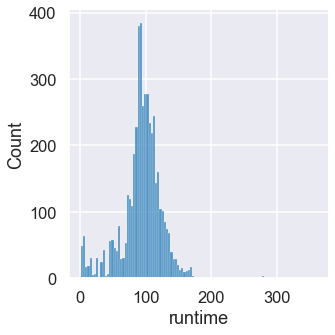

In [165]:
plt.figure(figsize=(10,10))
sns.displot(df['runtime']);

In [139]:
df = profit_data.copy()

# create a new binary column for each genre
for genre in genres:
    df.loc[:, genre] = df['genre'].apply(lambda x: 1 if genre in x.split() else 0)

df.head()

,movie_id,title,runtime,foreign_gross,popularity,release_date,vote_average,vote_count,production_budget,worldwide_gross,profit_ratio,genre,domestic_gross,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Fiction,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Science,Sport,Thriller,War,Western
23,tt0249516,Foodfight!,91.00,nan,4.71,2013-05-07,2.10,46.00,"45,000,000.00","73,706.00",0.00,Comedy Family Action Animation,0.00,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
38,tt0293429,Mortal Kombat,nan,nan,nan,NaN,nan,nan,"20,000,000.00","122,133,227.00",6.11,Adventure Fantasy Action,"70,433,227.00",1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
48,tt0326592,The Overnight,88.00,nan,6.58,2015-06-19,6.00,200.00,"200,000.00","1,165,996.00",5.83,Comedy Mystery,"1,109,808.00",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
49,tt3844362,The Overnight,79.00,nan,6.58,2015-06-19,6.00,200.00,"200,000.00","1,165,996.00",5.83,Comedy Mystery,"1,109,808.00",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
58,tt0337692,On the Road,124.00,"8,000,000.00",8.92,2012-12-21,5.60,518.00,"25,000,000.00","9,313,302.00",0.37,Drama Romance Adventure,"720,828.00",0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [1]:
df_melted = df.melt(id_vars=['profit_ratio'], value_vars=genres, var_name='genre', value_name='is_genre')
df_melted = df_melted[df_melted['is_genre'] == 1]
df_melted.sort_values('profit_ratio')

NameError: name 'df' is not defined

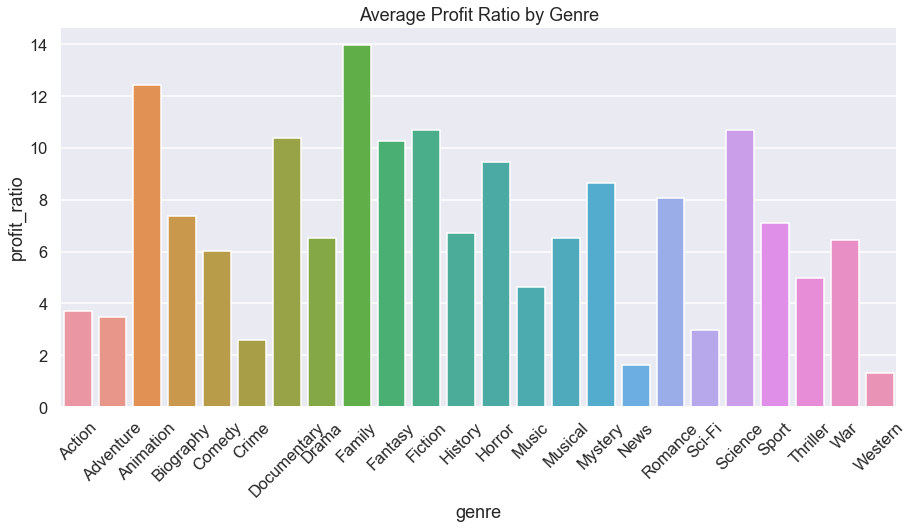

In [150]:
plt.figure(figsize=(15, 7))
sns.barplot(data=df_melted, x='genre', y='profit_ratio', ci=None)
plt.xticks(rotation=45)  # Rotate genre labels for better readability
plt.title('Average Profit Ratio by Genre')
plt.show()

### Questions

- Compare single genres (movies with "action" compared to movies with "comedy")
- After finding top tier of genres, compare the combinations (movies with "action|comedy" compared to movies with "action|romance", etc)
- Does the season of movie release impact performance?
- Do specific directors (or writers, actors) have impact on sales?


- Correlation between tomato score and profit?
- Are sequels usually successful?